- 2020.10.02 kouui : NIST database API and the begining of hydrogen atom

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np

%matplotlib inline
#%matplotlib tk
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
import sys
sys.path.append("../../")

%load_ext autoreload
%autoreload 2

from src.Structure import AtomCls
#from src.Atomic import Collision, SEsolver

from src.Util import Class

from src.Visual import Grotrian

import src.Constants as Cst
#from src.Atomic import LTELib

#from src.Function.StatisticalEquilibrium import LibClass as SELib

---

## The NIST database API

website : [https://www.nist.gov/pml/atomic-spectra-database](https://www.nist.gov/pml/atomic-spectra-database)

### download atomic Level data

In [4]:
from src.Util.Nist import LevelQuery
from src.Util.External import mendeleev

data_directory="/Users/liu/kouui/data/NIST/Level/"
_elementQ = LevelQuery.ElementQuery( waiting=1, data_directory=data_directory )
for i in range(1, 27):
    mendeleev_info = mendeleev.element( i )
    _element = mendeleev_info.symbol
    _elementQ.query( _element )
    _elementQ.to_csv()

[I 201002 07:27:20 Logger:17] will load/save data from/into /Users/liu/kouui/data/NIST/Level/
[I 201002 07:27:20 Logger:17] Querying for all ionization stage in element 'H'
[I 201002 07:27:20 Logger:17] Found unique notations = ['H I']
[I 201002 07:27:20 Logger:17] dataframe for 'H' has been loaded from : /Users/liu/kouui/data/NIST/Level/H.pickle
[I 201002 07:27:20 Logger:17] dataframe for 'H' has been saved as : /Users/liu/kouui/data/NIST/Level/H.csv
[I 201002 07:27:20 Logger:17] Querying for all ionization stage in element 'He'
[I 201002 07:27:20 Logger:17] Found unique notations = ['He I', 'He II']
[I 201002 07:27:20 Logger:17] dataframe for 'He' has been loaded from : /Users/liu/kouui/data/NIST/Level/He.pickle
[I 201002 07:27:20 Logger:17] dataframe for 'He' has been saved as : /Users/liu/kouui/data/NIST/Level/He.csv
[I 201002 07:27:20 Logger:17] Querying for all ionization stage in element 'Li'
[I 201002 07:27:20 Logger:17] Found unique notations = ['Li I', 'Li II', 'Li III']
[I 2

[I 201002 07:27:23 Logger:17] dataframe for 'K' has been loaded from : /Users/liu/kouui/data/NIST/Level/K.pickle
[I 201002 07:27:23 Logger:17] dataframe for 'K' has been saved as : /Users/liu/kouui/data/NIST/Level/K.csv
[I 201002 07:27:23 Logger:17] Querying for all ionization stage in element 'Ca'
[I 201002 07:27:23 Logger:17] Found unique notations = ['Ca I', 'Ca II', 'Ca III', 'Ca IV', 'Ca V', 'Ca VI', 'Ca VII', 'Ca VIII', 'Ca IX', 'Ca X', 'Ca XI', 'Ca XII', 'Ca XIII', 'Ca XIV', 'Ca XV', 'Ca XVI', 'Ca XVII', 'Ca XVIII', 'Ca XIX', 'Ca XX']
[I 201002 07:27:23 Logger:17] dataframe for 'Ca' has been loaded from : /Users/liu/kouui/data/NIST/Level/Ca.pickle
[I 201002 07:27:23 Logger:17] dataframe for 'Ca' has been saved as : /Users/liu/kouui/data/NIST/Level/Ca.csv
[I 201002 07:27:23 Logger:17] Querying for all ionization stage in element 'Sc'
[I 201002 07:27:23 Logger:17] Found unique notations = ['Sc I', 'Sc II', 'Sc III', 'Sc IV', 'Sc V', 'Sc VI', 'Sc VII', 'Sc VIII', 'Sc IX', 'Sc X', '

### download Einstein $A_{ji}$ coefficient data

In [5]:
from src.Util.Nist import LineQuery
from src.Util.External import mendeleev

data_directory="/Users/liu/kouui/data/NIST/Line/"
_elementQ = LineQuery.ElementQuery( waiting=1, data_directory=data_directory )
for i in range(1, 27):
    mendeleev_info = mendeleev.element( i )
    _element = mendeleev_info.symbol
    _elementQ.set_wavelength_range(0, 1000000, unit="AA") # 0-100um
    _elementQ.query( _element )
    _elementQ.to_csv()

[I 201002 07:30:22 Logger:17] will load/save data from/into /Users/liu/kouui/data/NIST/Line/
[I 201002 07:30:22 Logger:17] Querying for all ionization stage in element 'H'
[I 201002 07:30:22 Logger:17] Found unique notations = ['H I']
[I 201002 07:30:22 Logger:17] dataframe for 'H' has been loaded from : /Users/liu/kouui/data/NIST/Line/H.pickle
[I 201002 07:30:22 Logger:17] dataframe for 'H' has been saved as : /Users/liu/kouui/data/NIST/Line/H.csv
[I 201002 07:30:22 Logger:17] Querying for all ionization stage in element 'He'
[I 201002 07:30:22 Logger:17] Found unique notations = ['He I', 'He II']
[I 201002 07:30:22 Logger:17] dataframe for 'He' has been loaded from : /Users/liu/kouui/data/NIST/Line/He.pickle
[I 201002 07:30:22 Logger:17] dataframe for 'He' has been saved as : /Users/liu/kouui/data/NIST/Line/He.csv
[I 201002 07:30:22 Logger:17] Querying for all ionization stage in element 'Li'
[I 201002 07:30:22 Logger:17] Found unique notations = ['Li I', 'Li II', 'Li III']
[I 201002

[I 201002 07:30:26 Logger:17] dataframe for 'K' has been loaded from : /Users/liu/kouui/data/NIST/Line/K.pickle
[I 201002 07:30:26 Logger:17] dataframe for 'K' has been saved as : /Users/liu/kouui/data/NIST/Line/K.csv
[I 201002 07:30:26 Logger:17] Querying for all ionization stage in element 'Ca'
[I 201002 07:30:26 Logger:17] Found unique notations = ['Ca I', 'Ca II', 'Ca III', 'Ca IV', 'Ca V', 'Ca VI', 'Ca VII', 'Ca VIII', 'Ca IX', 'Ca X', 'Ca XI', 'Ca XII', 'Ca XIII', 'Ca XIV', 'Ca XV', 'Ca XVI', 'Ca XVII', 'Ca XVIII', 'Ca XIX', 'Ca XX']
[I 201002 07:30:26 Logger:17] dataframe for 'Ca' has been loaded from : /Users/liu/kouui/data/NIST/Line/Ca.pickle
[I 201002 07:30:27 Logger:17] dataframe for 'Ca' has been saved as : /Users/liu/kouui/data/NIST/Line/Ca.csv
[I 201002 07:30:27 Logger:17] Querying for all ionization stage in element 'Sc'
[I 201002 07:30:27 Logger:17] Found unique notations = ['Sc I', 'Sc II', 'Sc III', 'Sc IV', 'Sc V', 'Sc VI', 'Sc VII', 'Sc VIII', 'Sc IX', 'Sc X', 'Sc X

## format `*.Level` and `*.Aji` data file

### `*.Level` data file

In [33]:
import os
from src.Util.DataFormatter import LevelFormatter

ROOT_DIR = "../.."
_template_path = os.path.join( ROOT_DIR, 'data/atom/templates/spectrum.Level' )

_context = {
    "csv_path" : "/Users/liu/kouui/data/NIST/Level/Ca.csv",
    "title" : "Ca II H/K infrared",
    'element' : 'Ca',
    "level_info" : {
        "II" : {
            "n_level" : 5,            # simultaneously include levels with same configuration and term
            'has_continuum' : True,   # only for final stage
        }
    },
    "out_folder" : "../../data/atom/Ca_II",
    "out_file" : "Ca_II.new.Level"
}

_context = {
    "csv_path" : "/Users/liu/kouui/data/NIST/Level/Ca.csv",
    "title" : "Ca II H/K infrared",
    'element' : 'Ca',
    "level_info" : {
        "I"  : {
            "n_level" : 1,
        },
        "II" : {
            "n_level" : 5,            # simultaneously include levels with same configuration and term
            'has_continuum' : False,   # only for final stage
        }
    },
    "out_folder" : "../../data/atom/Ca_II",
    "out_file" : "Ca_II.new.Level"
}

_context = {
    "csv_path" : "/Users/liu/kouui/data/NIST/Level/H.csv",
    "title" : "Hydrogen",
    'element' : 'H',
    "level_info" : {
        "I" : {
            "n_level" : 8,            # simultaneously include levels with same configuration and term
            'has_continuum' : True,   # only for final stage
        }
    },
    "out_folder" : "../../data/atom/H",
    "out_file" : "H.Level"
}

LevelFormatter.from_nist_csv( _template_path, _context )

[I 201002 07:47:31 Logger:17] loaded Level table from /Users/liu/kouui/data/NIST/Level/H.csv
[I 201002 07:47:31 Logger:17] added 8 Levels from ionization stage I
[I 201002 07:47:31 Logger:17] added comtinuum from II
[I 201002 07:47:31 Logger:17] saved as ../../data/atom/H/H.Level


### `*.Aji` data file

In [34]:
import os
from src.Util.DataFormatter import AjiFormatter




ROOT_DIR = "../../"
_template_path = os.path.join( ROOT_DIR, 'data/atom/templates/spectrum.Aji' )
_context = {
    "csv_path" : "/Users/liu/kouui/data/NIST/Level/H.csv",
    "line_csv_path" : "/Users/liu/kouui/data/NIST/Line/H.csv",
    "title" : "Hydrogen",
    'element' : 'H',
    "level_info" : {
        "I" : {
            "n_level" : 8,            # simultaneously include levels with same configuration and term
            'has_continuum' : True,   # only for final stage
        }
    },
    "out_folder" : "../../data/atom/H/Einstein_A",
    "out_file" : "Nist.Aji"
}
AjiFormatter.from_nist_csv( _template_path, _context )

[I 201002 07:48:01 Logger:17] loaded Level table from /Users/liu/kouui/data/NIST/Level/H.csv
[I 201002 07:48:01 Logger:17] loaded Level table from /Users/liu/kouui/data/NIST/Line/H.csv
[I 201002 07:48:01 Logger:17] added 28 Aji coefficients for ionization stage I
[I 201002 07:48:02 Logger:17] saved as ../../data/atom/H/Einstein_A/Nist.Aji


---

## hydrogen atom

In [35]:
atom, paths = AtomCls.InitAtom("../../data/conf/H.conf", isHydrogen=True)

In [36]:
Class.help(atom)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

isPrint                      bool               v: False
filepath_dict                dict               l: 4
Title                        str                v: Hydrogen a...
Z                            int                v: 1
Element                      str                v: H
nLevel                       int                v: 9
Mass                         float              v: 1.008
Abun                         float              v: 1.0
Level                        recarray           ---
  |-> erg                    float64 array      s: (9,)
  |-> g                      uint8 array        s: (9,)
  |-> stage                  uint8 array        s: (9,)
  |-> gamma                  float64 array      s: (9,)
  |-> isGround               bool array         s: (9,)
Leve

read position


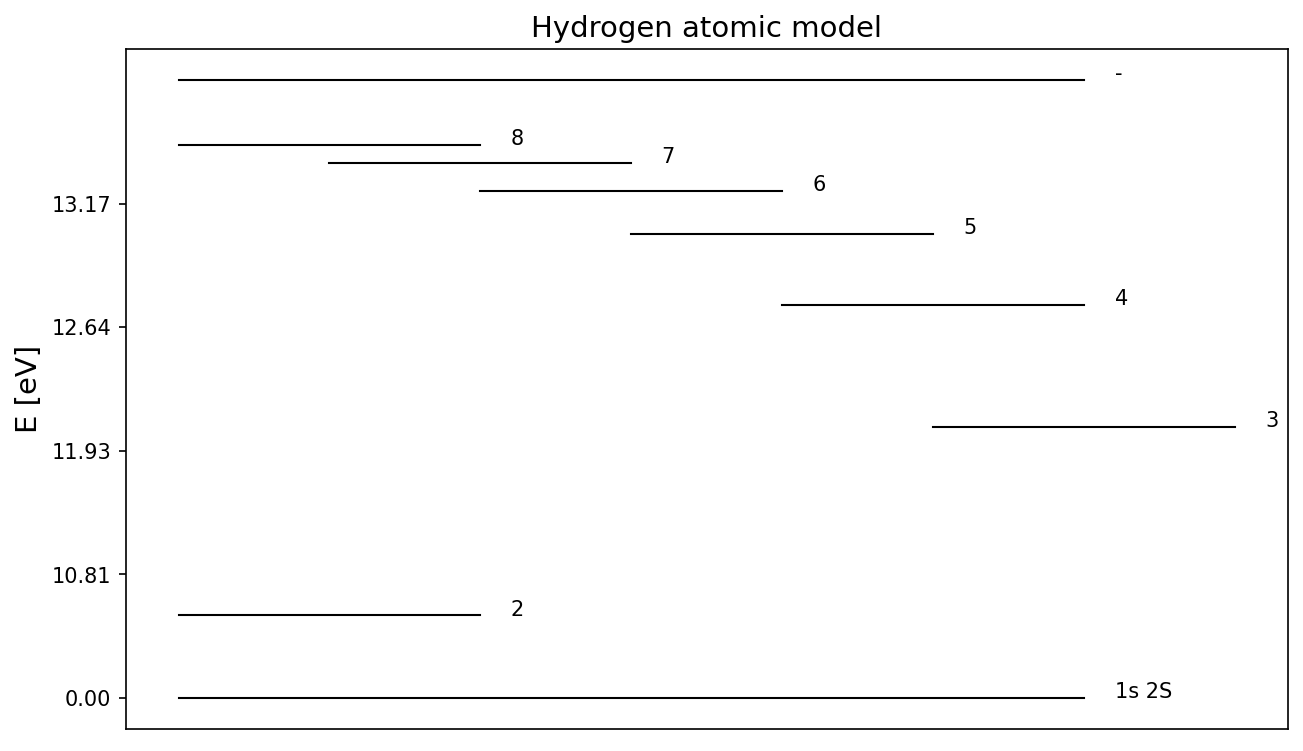

In [37]:
scaleFunc     = lambda x: x**(7)
scaleFunc_inv = lambda x : x**(1/7)
gro = Grotrian.Grotrian(_atom=atom, _path=paths["Grotrian"], 
                        _scaleFunc=scaleFunc, _scaleFunc_inv=scaleFunc_inv)
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50 )

gro.show_fig()

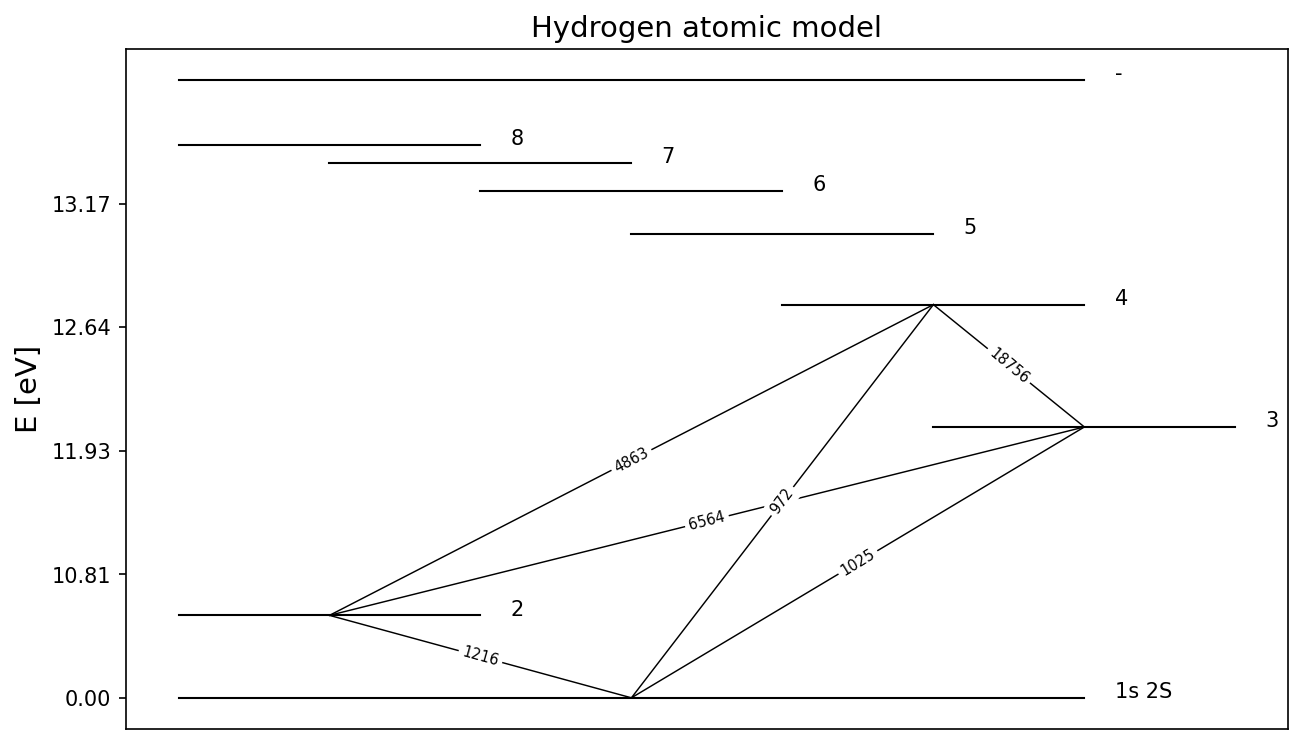

In [38]:
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50 )

gro.plot_transitions(_text_selection="wavelength")
gro.show_fig()